## Importing Python Libraries


In [ ]:
import numpy as np
import pandas as pd

Reading the csv file and making dataframe

In [11]:
df=pd.read_csv('placement.csv')

In [12]:
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [13]:
df.shape

(100, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [15]:
df=df.iloc[:,1:]

In [16]:
df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

## Importing Matplotlib

In [17]:
import matplotlib.pyplot as plt

The graph below shows student that will get placement based on their cgpa and IQ. The student in the graph below marked with blue are not placed and the student marked with yellow are placed.

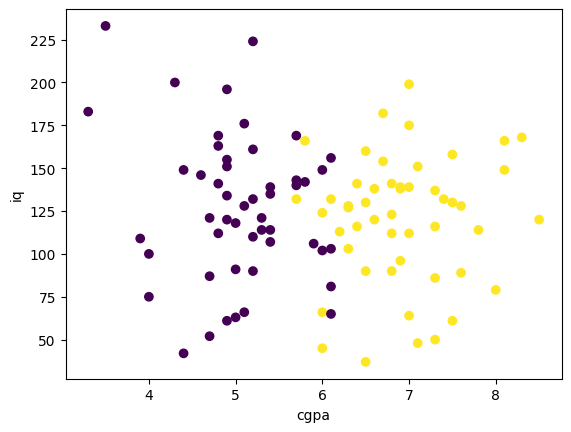

In [18]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.xlabel('cgpa')
plt.ylabel('iq')
plt.show()

In [19]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

## Train Test Split

scikot learn's train test split allows us to split out dataset into a training set and testing set. Here, the model is trained on the traing set and to test its accuracy its then tested with the test set.

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [21]:
X_train

cgpa     iq
34   4.8  163.0
9    5.1   66.0
26   7.0  199.0
90   7.3   86.0
83   7.5  130.0
..   ...    ...
12   5.4  139.0
85   5.8  166.0
66   6.9   96.0
11   6.9  138.0
79   6.5   90.0

[90 rows x 2 columns]

In [22]:
Y_train

34    0
9     0
26    1
90    1
83    1
     ..
12    0
85    1
66    1
11    1
79    1
Name: placement, Length: 90, dtype: int64

## **Standard Scaler**

**sklearn.preprocessing**-> This is a module within the scikit-learn library that contains various tools for preparing your data before feeding it into a machine learning model.

**StandardScaler** standardizes your data by performing two key operations:

**Centering:** It subtracts the mean of each feature (column) from all the values in that column. This ensures that each feature has a mean of 0.

**Scaling**: It divides each feature by its standard deviation. This ensures that each feature has a standard deviation of 1.

In [23]:
from sklearn.preprocessing import StandardScaler

Creating an object and calling constructor of StandardScaler class.

In [24]:
scaler=StandardScaler()

Standardizing dataset

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

## Logistic Regression Model

importing logistic regression model from sklearn.model

In [27]:

from sklearn.linear_model import LogisticRegression

In [28]:
clf=LogisticRegression()

Training our model

In [29]:
clf.fit(X_train,Y_train)

LogisticRegression()

Assinging predicted values to y_pred

In [30]:
y_pred=clf.predict(X_test)

In [31]:
Y_test

86    0
32    1
21    1
53    1
78    0
48    1
76    0
74    1
82    1
29    1
Name: placement, dtype: int64

**from sklearn.metrics import accuracy_score**


This function is used to calculate the accuracy of a classification model's predictions.

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(Y_test,y_pred)

0.9

**plot_decision_regions**

 This function is designed to visually represent the decision boundaries of a classification model.
In simpler terms:

In [34]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

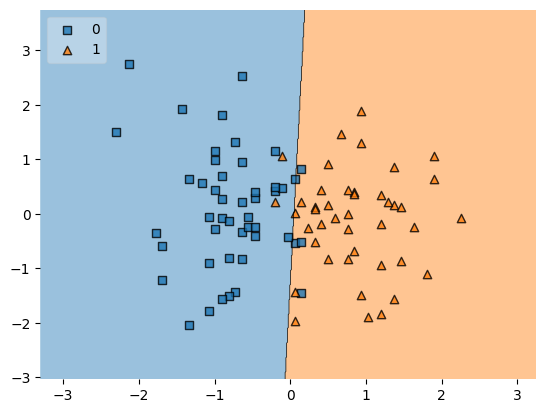

In [35]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [36]:
import pickle

In [37]:
pickle.dump(clf,open('model.pkl','wb'))